In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from tueplots import bundles
from tueplots.constants.color import rgb
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


In [3]:
def smooth(y, window=10):
    """Apply smoothing to the data"""
    box = np.ones(window) / window
    y_smooth = np.convolve(y, box, mode='valid')
    return y_smooth

In [81]:
def plot(name, window_sizes, colors, title, size="full", ax=None):
    plot_dir = '../../report/plots'
    data_path = f'../outputs/{name}/tensorboard/'
    # Load all tensorboard files and combine the data
    reward_data = []
    for file in os.listdir(data_path):
        if file.startswith('events.out.tfevents'):
            event_acc = EventAccumulator(os.path.join(data_path, file))
            event_acc.Reload()
            try:
                reward_data.extend(event_acc.Scalars('Reward'))
            except:
                print("No reward data found in file")
    # Prepare data for plotting
    rewards = [entry.value for entry in reward_data]
    
    # set plotting stylesheet
    plt.rcParams.update(bundles.icml2022(column=size, nrows=1, ncols=1, usetex=False))

    for i, ws in enumerate(window_sizes):
            if len(rewards) > ws:
                smooth_r = smooth(rewards, window=ws)
                smooth_s = range(ws, len(rewards) + 1)
                if ax is None:
                    plt.plot(smooth_s, smooth_r, label=f'Window size: {ws}', color=colors[i])
                else:
                    ax.plot(smooth_s, smooth_r, label=f'Window size: {ws}', color=colors[i])
        
        
    if ax is None:
        plt.title(title)
        plt.xlabel('Episodes')
        plt.ylabel('Moving Averagee Reward')
        plt.legend()
        plt.savefig(f'{plot_dir}/{name}.pdf')
        plt.show()
    else:
        ax.set_title(title)
        ax.set_xlabel('Episodes')
        ax.set_ylabel('Moving Averagee Reward')    


No reward data found in file
No reward data found in file
No reward data found in file
No reward data found in file


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


No reward data found in file
No reward data found in file


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
/tmp/ipykernel_281087/2847872075.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were 

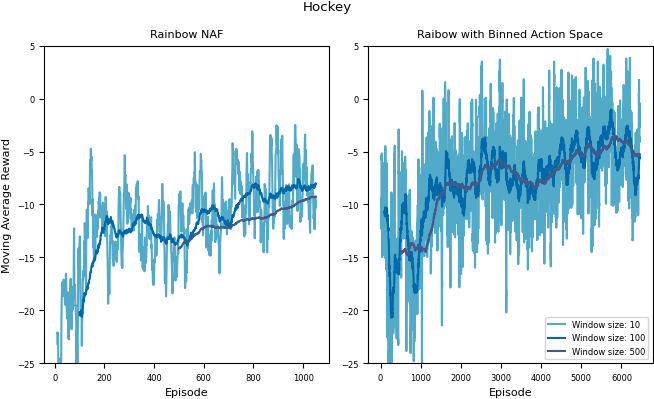

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2)



name = 'rainbow_hockey_binned_strong'
window_sizes = [10, 100, 500]
colors = [rgb.tue_lightblue, rgb.tue_blue, rgb.tue_darkblue]
plot(name, window_sizes, colors, title='Raibow with Binned Action Space', size="full", ax=ax2)

name = 'rainbow_naf'
window_sizes = [10, 100, 500]
colors = [rgb.tue_lightblue, rgb.tue_blue, rgb.tue_darkblue]
plot(name, window_sizes, colors, title='Rainbow NAF', size="full", ax=ax1)

# set plotting stylesheet
plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=1, usetex=False))

ax1.set_xlabel('Episode')
ax2.set_xlabel('Episode')
ax1.set_ylabel('Moving Average Reward')
ax2.set_ylabel('')
ax1.set_ylim(-25, 5)
ax2.set_ylim(-25, 5)
fig.suptitle("Hockey")
plt.legend()
plt.tight_layout()
plt.savefig('../../report/plots/hockey.pdf')
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


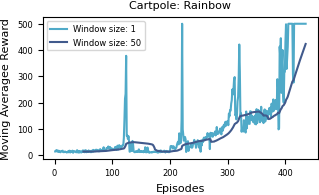

In [79]:
name = 'cartpole_rainbow'
window_sizes = [1, 50]
colors = [rgb.tue_lightblue, rgb.tue_darkblue]
plot(name, window_sizes, colors, title='Cartpole: Rainbow', size="half")

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


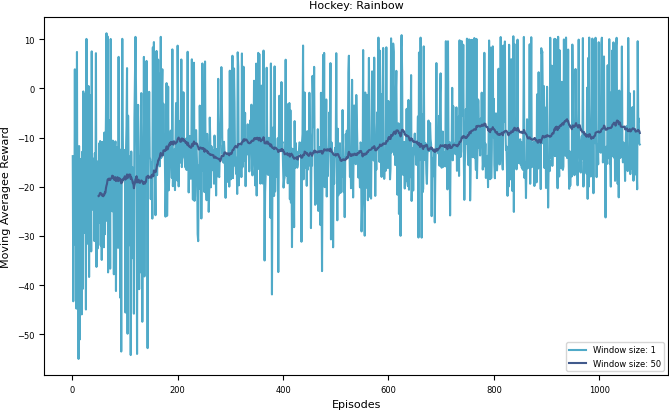

In [88]:
name = 'rainbow_naf'
window_sizes = [1, 50]
colors = [rgb.tue_lightblue, rgb.tue_darkblue]
plot(name, window_sizes, colors, title='Hockey: Rainbow', size="full")

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


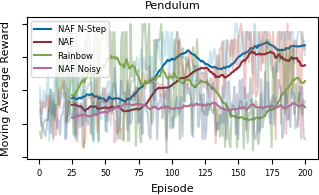

In [29]:
names = ['pendulum_naf_n_step',  'pendulum_naf', 'pendulum_rainbow','pendulum_naf_noisy']
screen_names = ['NAF N-Step', 'NAF', 'Rainbow', 'NAF Noisy']
plot_dir = '../../report/plots'

# set plotting stylesheet
plt.rcParams.update(bundles.icml2022(column='half', nrows=1, ncols=1, usetex=False))

colors = [[rgb.tue_lightblue, rgb.tue_blue], [rgb.tue_ocre, rgb.tue_red] , [rgb.tue_darkgreen, rgb.tue_green], [rgb.tue_darkblue, rgb.tue_violet]]

for j, name in enumerate(names):
    data_path = f'../outputs/{name}/tensorboard/'

    # Load tensorboard data
    event_acc = EventAccumulator(data_path)
    event_acc.Reload()
    reward_data = event_acc.Scalars('Reward')

    # Prepare data for plotting
    window_sizes = [1, 25]
    rewards = [entry.value for entry in reward_data][:200]

    for i, ws in enumerate(window_sizes):
        if len(rewards) > ws:
            smooth_r = smooth(rewards, window=ws)
            smooth_s = range(ws, len(rewards) + 1)
            if i == 0:
                plt.plot(smooth_s, smooth_r, color=colors[j][i], alpha=0.3)
            else:
                plt.plot(smooth_s, smooth_r, label=screen_names[j], color=colors[j][i])

plt.xlabel('Episode')
plt.ylabel('Moving Average Reward')
plt.title('Pendulum')
plt.legend()
plt.gca().yaxis.set_ticklabels([])
plt.savefig(os.path.join(plot_dir, 'pendulum_rewards.pdf'))
plt.show()
plt.close()
